# CONTEXTO DO PROBLEMA

A empresa **All in One Place** é uma empresa Outlet Multimarcas, ou seja, ela comercializa produtos de segunda linha de várias marcas a um preço menor, através de um e-commerce.

Em pouco mais de 1 anos de operação, o time de marketing percebeu que alguns clientes da sua base, compram produtos mais caros, com alta frequência e acabam contribuindo com uma parcela significativa do faturamento da empresa.

Baseado nessa percepção, o time de marketing vai lançar um programa de fidelidade para os melhores clientes da base, chamado Insiders. Mas o time não tem um conhecimento avançado em análise de dados para eleger os participantes do programa.

Por esse motivo, o time de marketing requisitou ao time de dados uma seleção de clientes elegíveis ao programa, usando técnicas avançadas de manipulação de dados.

# O PROBLEMA

Você faz parte do time de cientistas de dados da empresa All In One Place, que precisa determinar quem são os clientes elegíveis para participar do Insiders. Em posse dessa lista, o time de Marketing fará uma sequência de ações personalizadas e exclusivas ao grupo, de modo a aumentar o faturamento e a frequência de compra.

Como resultado para esse projeto, é esperado que você entregue uma lista de pessoas elegíveis a participar do programa Insiders, junto com um relatório respondendo às seguintes perguntas:

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
2. Quantos clientes farão parte do grupo?
3. Quais as principais características desses clientes ?
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
7. Quais as condições para uma pessoa ser removida do Insiders ?
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

# ENTENDIMENTO DO PROBLEMA

**Motivação:** 
- Identificar os clientes elegíveis para participar do programa de finalidade (Insiders).

**Causa Raiz do Problema:** 
- Aumentar o faturamento da empresa e a frequência de compra dos clientes.

**Tipo de Problema:** 
- Identificar perfil de clientes que trazem mais retorno financeiro.

**Potênciais Métodos:** 
- Clusterização.

**Entrega da Solução:** 
- WebApp.

# PLANEJAMENTO DA SOLUÇÃO

1. Carregar, explorar os dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.

2. Levantar Hipóteses sobre as características de um cliente Insider. Validar ou refutar essas hipóteses através dos dados.

3. Preparar os Dados para que os Algoritmos Estatísticos ou de Machine Learning sejam capazes de aprender a tarefa.

4. Escrever vários algoritmos de Agrupamento ou clusterização.

5. Contabilizar a Performance do Modelo de Machine Learning e transformar em Performance de Negócio.

6. Desenvolver uma API que retorne um “Score de Cluster” para cada cliente, indicando à qual cluster ele pertence.

7. Criar um README sobre como interpretar e usar a sua solução.

8. Escrever um Relatório, respondendo às perguntas de negócio.

# 0.0 IMPORTS

In [32]:
# Manipualtion
import pandas as pd
import numpy as np
import inflection

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn import cluster

## 0.1 Funções Auxiliares

## 0.2 Carregamento de Dados

In [12]:
path = 'C:/Users/Jhonatans/projects/ML/Clusterization/Loyalty-Program-Ecommerce/' # Path project
df = pd.read_csv(path + 'data/Ecommerce.csv', encoding='cp1252') # Load data

df.drop(columns=['Unnamed: 8'], inplace=True) # Drop column Unnamed: 8
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0 DESCRIÇÃO DE DADOS

## 1.1 Dimensão de Dados

In [13]:
print('Nº Rows: {}'.format(df.shape[0]))
print('Nº Columns: {}'.format(df.shape[1]))

Nº Rows: 541909
Nº Columns: 8


## 1.2 Renomeação de Colunas

In [14]:
# Text to snakecase
snakecase = lambda x: inflection.underscore(x)

# New columns with snakecase
df.columns = list(map(snakecase, df.columns))
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.3 Tipo de Dados

In [15]:
df.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Verificação de Dados Ausentes

In [16]:
df.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Tratamento de Dados Ausentes

In [17]:
# Remove NaN
df1 = df.dropna().copy()

print(df1.isna().sum(), '\n')
print('Removed data: {:.2f}%'.format(1-(df1.shape[0] / df.shape[0])))
print('Nº Rows final: {}'.format(df1.shape[0]))

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64 

Removed data: 0.25%
Nº Rows final: 406829


## 1.6 Mudança do Tipo de Dados

In [18]:
# invoice_date - str to datetime
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype('int')

## 1.7 Estatística Descritiva

### 1.7.1 Atributos Numéricos

### 1.7.2 Atributos Categóricos

# 2.0 FEATURE ENGINEERING

## 2.1 Criação de Feature

In [19]:
# Copy dataframe to section 2
df2 = df1.copy()

# data reference
df_ref = df2['customer_id'].drop_duplicates()

# Gross Revenue (Faturamento) quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency - Last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

# 3.0 FILTRAGEM DE DADOS

In [20]:
df3 = df_ref.copy()

# 4.0 EDA

In [21]:
df4 = df3.copy()

# 5.0 PREPARAÇÃO DE DADOS

In [22]:
df5 = df4.copy()

# 6.0 SELEÇÃO DE FEATURE

In [23]:
df6 = df5.copy()

# 7.0 AJUSTE DE HIPERPARAMETROS

In [26]:
x = df6.drop(columns=['customer_id'])

In [27]:
clusters = [2, 3, 4, 5, 6]

## 7.1 Within-Culster Sum of Square (WSS)

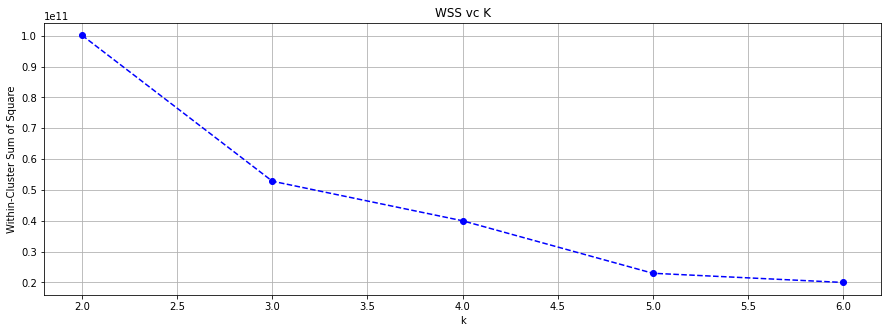

In [38]:
wss = []

for k in clusters:
    
    # model definition
    kmeans = cluster.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    kmeans.fit(x)
    
    # validation
    wss.append(kmeans.inertia_)
    
# plot wss - Elbow Method
plt.figure(figsize=(15, 5))
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Square')
plt.grid()
plt.title('WSS vc K');

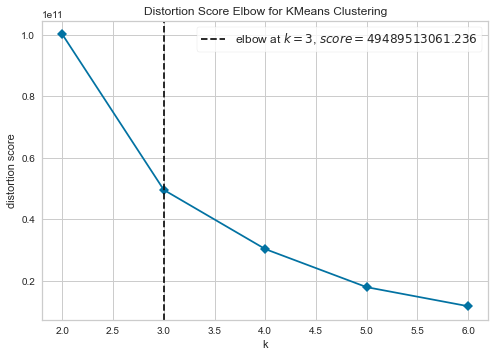

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(cluster.KMeans(), k=clusters, timings=False)
kmeans.fit(x)
kmeans.show()

## 7.2 Silhouette Score

# 8.0 TREINAMENTO DO MODELO

# 9.0 ANÁLISE DE CLUSTER

# 10.0 DEPLOY MODELO